In [26]:
!pip install yfinance

In [28]:
!pip install pandas-datareader
    
    

In [20]:
#Data exquisition and data exquisition function

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date, datetime, time, timezone

import yfinance as yf

In [21]:
# The function to obtain stock price when ticker code in input
def get_stock_data(ticker, start, end):
    data = yf.download(ticker, start, end)
    data.insert(0, "Ticker", ticker) #insert columns into dataframe at specific locations
    return data

In [22]:
#Test to see if it works or not

start = datetime(2020, 1, 1)
end = datetime.today()

d = get_stock_data('DIS', start, end)
d.head()

[*********************100%%**********************]  1 of 1 completed


,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,DIS,145.289993,148.199997,145.100006,148.199997,147.718567,9502100
2020-01-03,DIS,146.399994,147.899994,146.050003,146.500000,146.024094,7320200
2020-01-06,DIS,145.539993,146.029999,144.309998,145.649994,145.176849,8262500
2020-01-07,DIS,145.990005,146.869995,145.419998,145.699997,145.226685,6906500
2020-01-08,DIS,145.490005,146.130005,144.820007,145.399994,144.927658,6984200


In [23]:
#use reshape the table by given index/columns values using pivot
d = d.pivot(columns = "Ticker", values = "Close")
d.head()

Ticker,DIS
Date,
2020-01-02,148.199997
2020-01-03,146.500000
2020-01-06,145.649994
2020-01-07,145.699997
2020-01-08,145.399994


In [24]:
#Create dataframe for analysis
# SPY : track the leading US S&P500

SPY = get_stock_data('SPY', start, end)

IYW = get_stock_data('IYW', start, end)

VT = get_stock_data('VT', start, end)

DBA = get_stock_data('DBA', start, end)

TLT = get_stock_data('TLT', start, end)

PDBC = get_stock_data('PDBC', start, end)

IAU = get_stock_data('IAU', start, end)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [25]:

SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1003 entries, 2020-01-02 to 2023-12-26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     1003 non-null   object 
 1   Open       1003 non-null   float64
 2   High       1003 non-null   float64
 3   Low        1003 non-null   float64
 4   Close      1003 non-null   float64
 5   Adj Close  1003 non-null   float64
 6   Volume     1003 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 62.7+ KB


In [26]:
SPY = SPY.pivot(columns = "Ticker", values = "Close")

IYW = IYW.pivot(columns = "Ticker", values = "Close")

VT = VT.pivot(columns = "Ticker", values = "Close")

DBA = DBA.pivot(columns = "Ticker", values = "Close")

TLT = TLT.pivot(columns = "Ticker", values = "Close")

PDBC = PDBC.pivot(columns = "Ticker", values = "Close")

IAU = IAU.pivot(columns = "Ticker", values = "Close")


In [27]:
#Concate all the df into one df called 'stock'

Stock = pd.concat([SPY, IYW, VT, DBA, TLT, PDBC, IAU], axis = 1, join = 'outer')
Stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


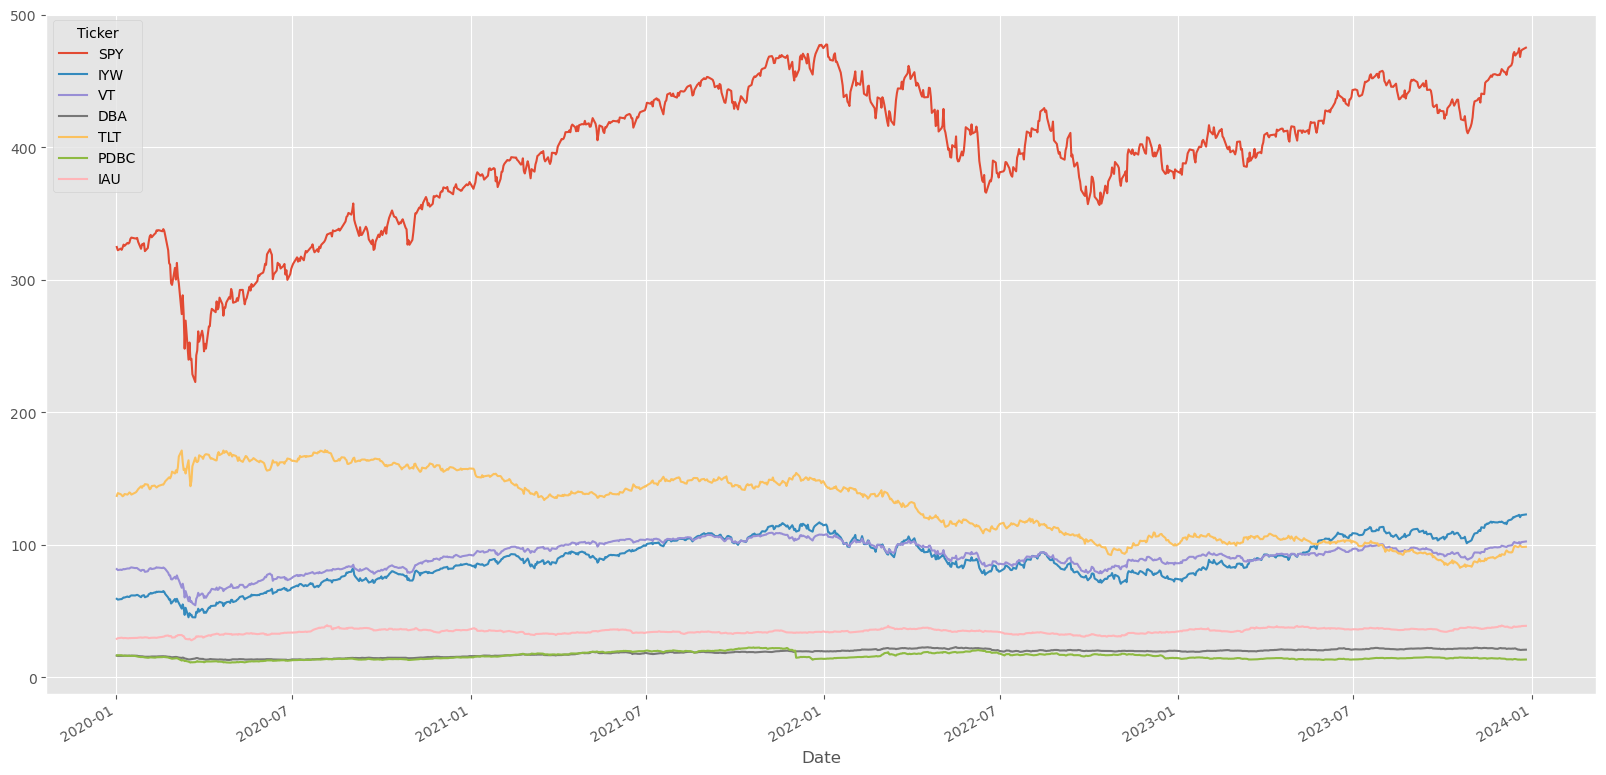

In [28]:
#the graph represent Stock
plt.style.use('ggplot')
Stock.plot(figsize = (20, 10))
plt.show()

In [29]:
Covid = Stock['2020-2-1' : '2020-7-31']

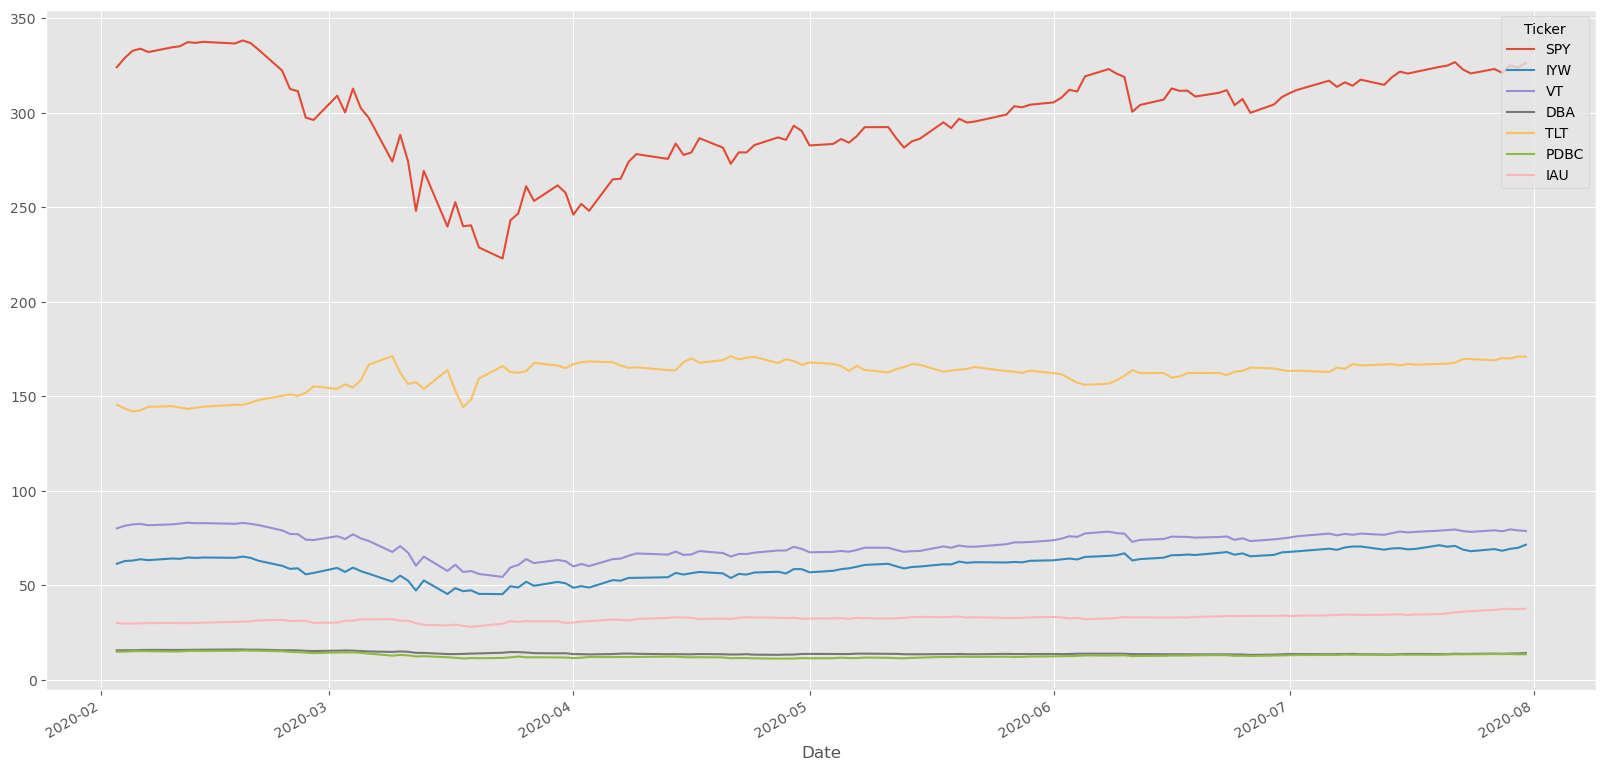

In [30]:
plt.style.use('ggplot')
Covid.plot(figsize = (20, 10))
plt.show()

In [31]:
#Separating the relevant perido factors to check the graph

x = Covid.index
s_y = Covid[['SPY']]
i_y = Covid[['IAU']]
d_y = Covid[['DBA']]
t_y = Covid[['TLT']]




Text(0.5, 0.98, 'Covid 19')

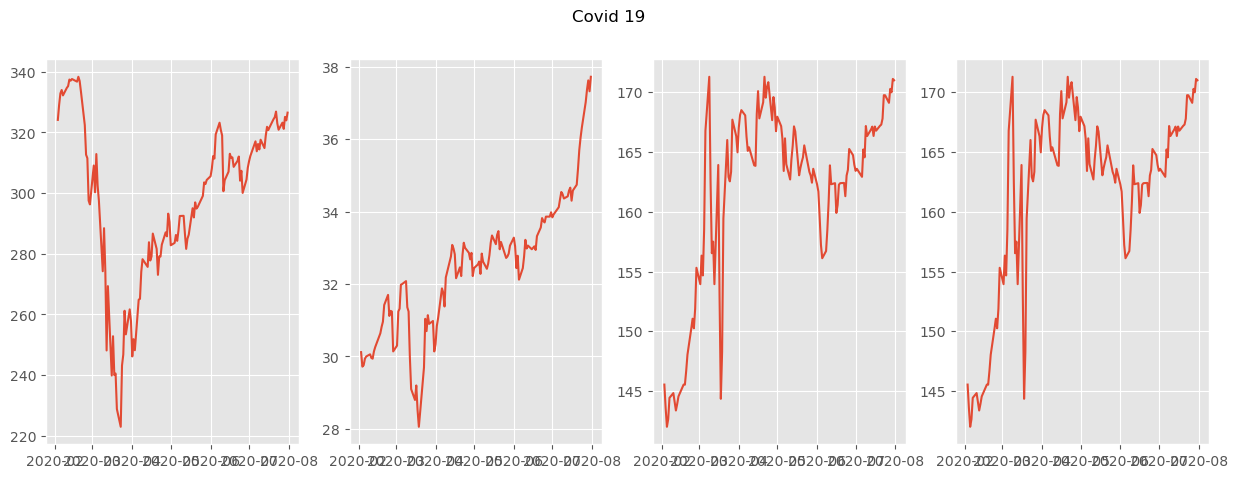

In [33]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize = (15, 5))
axs[0].plot(x, s_y)
axs[1].plot(x, i_y)
axs[2].plot(x, t_y)
axs[3].plot(x,t_y)

fig.suptitle('Covid 19')

In [19]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from datetime import date, datetime, time, timezone

In [34]:
#Create new function to obtain stock price
def get_stock_yf(ticker, start, end):
    data = yf.download(ticker, start, end)
    data.insert(0, 'Ticker', ticker)
    return data

In [44]:
ticker  = 'PDBC' #for testing
start = datetime(2020, 1,1)
end = datetime.today()

df = get_stock_yf(ticker, start, end)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,PDBC,16.570000,16.670000,16.520000,16.639999,9.154051,4004600
2020-01-03,PDBC,16.809999,16.840000,16.709999,16.780001,9.231069,760200
2020-01-06,PDBC,16.900000,16.910000,16.770000,16.799999,9.242070,1608700
2020-01-07,PDBC,16.750000,16.799999,16.716999,16.770000,9.225568,1723200
2020-01-08,PDBC,16.770000,16.770000,16.363001,16.540001,9.099039,923300


In [38]:
df.drop(['Ticker','Open','High','Low','Close','Adj Close'], axis=1, inplace=True)
df.head() #drop = delete(if inplace = true, then it's going to delete every data element in talbe as given)

,Volume
Date,
2020-01-02,4004600
2020-01-03,760200
2020-01-06,1608700
2020-01-07,1723200
2020-01-08,923300


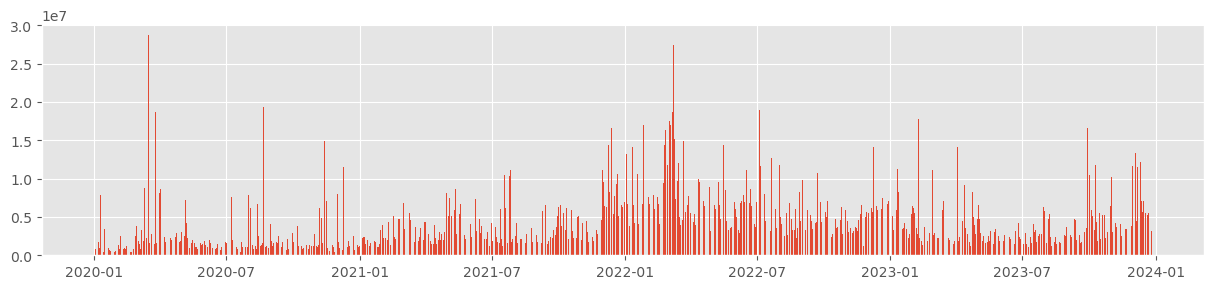

In [45]:
x = df.index
y = df['Volume']
plt.figure(figsize = (15, 3))
plt.bar(x, y)
plt.show()

In [46]:
ticker = 'PDBC'
start = datetime(2020, 1, 1)
end - datetime.today()



datetime.timedelta(days=-1, seconds=86393, microseconds=57173)

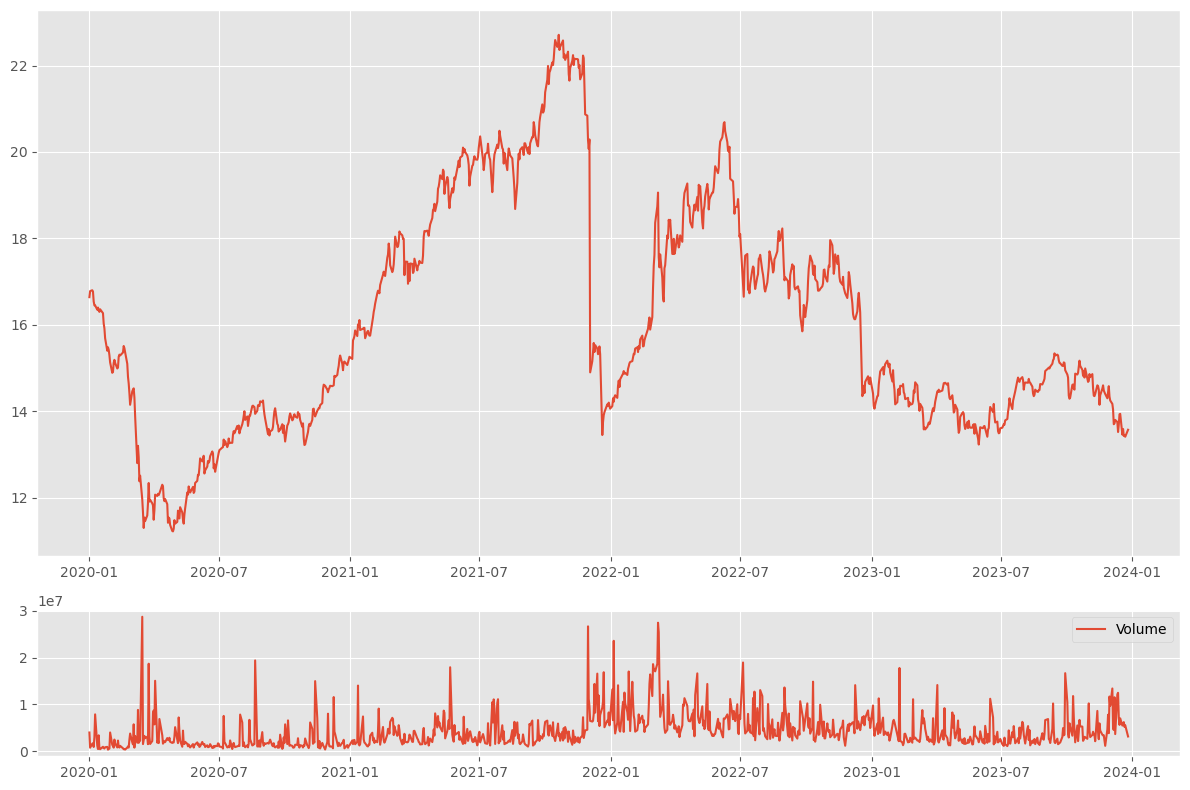

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

top_grid = plt.subplot2grid((4,4),(0,0), rowspan=3, colspan=4)
bottom_grid = plt.subplot2grid((4,4),(3,0),rowspan=1, colspan=4)

top_grid.plot(df.index, df['Close'], label='Close')
bottom_grid.plot(df.index, df['Volume'], label='Volume')

plt.tight_layout()

plt.legend()
plt.show()




In [49]:
Stock.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,324.869995,59.355000,81.809998,16.500000,137.009995,16.639999,29.219999
2020-01-03,322.410004,58.762501,81.070000,16.309999,139.119995,16.780001,29.620001
2020-01-06,323.640015,59.125000,81.370003,16.350000,138.330002,16.799999,29.920000
2020-01-07,322.730011,59.147499,81.120003,16.389999,137.649994,16.770000,30.040001
2020-01-08,324.450012,59.737499,81.449997,16.309999,136.740005,16.540001,29.820000


In [50]:
Stock['SPY']

Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2023-12-19    474.839996
2023-12-20    468.260010
2023-12-21    472.700012
2023-12-22    473.649994
2023-12-26    475.274994
Name: SPY, Length: 1003, dtype: float64

In [51]:
Stock['SPY'].shift(1)

Date
2020-01-02           NaN
2020-01-03    324.869995
2020-01-06    322.410004
2020-01-07    323.640015
2020-01-08    322.730011
                 ...    
2023-12-19    471.970001
2023-12-20    474.839996
2023-12-21    468.260010
2023-12-22    472.700012
2023-12-26    473.649994
Name: SPY, Length: 1003, dtype: float64

In [53]:
spy_daily_price_change = (Stock['SPY']/Stock['SPY'].shift(1)-1)*100
spy_daily_price_change

Date
2020-01-02         NaN
2020-01-03   -0.757223
2020-01-06    0.381505
2020-01-07   -0.281178
2020-01-08    0.532954
                ...   
2023-12-19    0.608088
2023-12-20   -1.385727
2023-12-21    0.948192
2023-12-22    0.200969
2023-12-26    0.343080
Name: SPY, Length: 1003, dtype: float64

<Axes: xlabel='Date'>

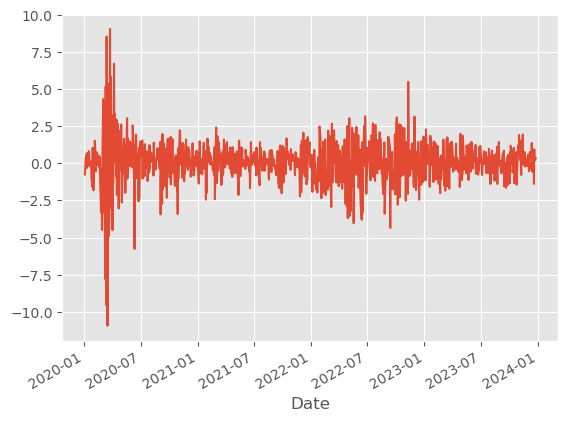

In [54]:
spy_daily_price_change.plot()

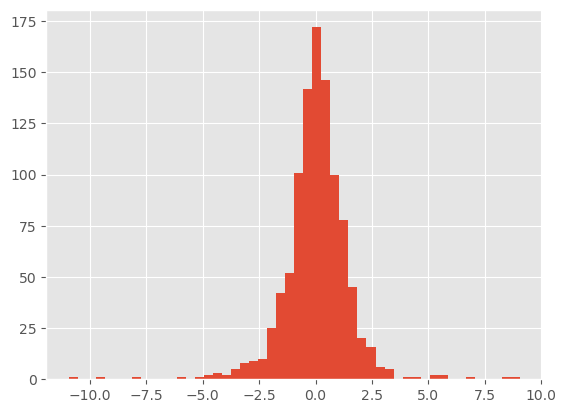

In [56]:
spy_daily_price_change = (Stock['SPY'] - Stock['SPY'].shift(1))/Stock['SPY'].shift(1) * 100
spy_daily_price_change.iloc[0] = 0 

plt.hist(spy_daily_price_change, bins= 50)
plt.show()

In [57]:
stock_daily_pc = (Stock - Stock.shift(1))/Stock.shift(1) * 100
stock_daily_pc.head()

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.757223,-0.998229,-0.904532,-1.151518,1.540034,0.841354,1.368931
2020-01-06,0.381505,0.616889,0.370054,0.245254,-0.567850,0.119181,1.012827
2020-01-07,-0.281178,0.038053,-0.307239,0.244642,-0.491584,-0.178564,0.401072
2020-01-08,0.532954,0.997507,0.406798,-0.488102,-0.661089,-1.371494,-0.732361


In [58]:
# daily cumulative
stock_daily_cr = stock_daily_pc.cumsum()
stock_daily_cr


Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.757223,-0.998229,-0.904532,-1.151518,1.540034,0.841354,1.368931
2020-01-06,-0.375718,-0.381340,-0.534478,-0.906264,0.972184,0.960535,2.381757
2020-01-07,-0.656896,-0.343287,-0.841717,-0.661622,0.480600,0.781971,2.782830
2020-01-08,-0.123942,0.654220,-0.434919,-1.149724,-0.180489,-0.589523,2.050469
...,...,...,...,...,...,...,...
2023-12-19,48.278864,90.979626,31.850322,28.413465,-25.612640,-5.312707,32.750846
2023-12-20,46.893137,89.497179,30.480055,27.226944,-24.935121,-6.490042,32.207089
2023-12-21,47.841329,90.729098,31.770124,27.082858,-25.567903,-6.341125,32.910032


<Axes: xlabel='Date'>

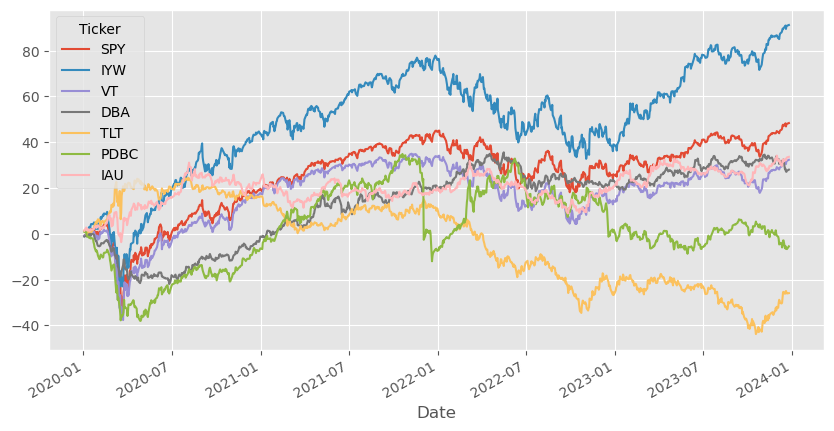

In [59]:
stock_daily_cr.plot(figsize=(10,5))

In [60]:
#corelation coefficient measure the strength of the association between data
# close to 1.0, the stronger relationship and close to 0, less relationship

df_corr = stock_daily_pc.corr()
df_corr

Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Ticker,,,,,,,
SPY,1.000000,0.919126,0.975749,0.248117,-0.177304,0.291610,0.144737
IYW,0.919126,1.000000,0.887121,0.194450,-0.099816,0.220507,0.151069
VT,0.975749,0.887121,1.000000,0.278843,-0.168022,0.325513,0.188200
DBA,0.248117,0.194450,0.278843,1.000000,-0.139774,0.465856,0.182653
TLT,-0.177304,-0.099816,-0.168022,-0.139774,1.000000,-0.123005,0.277756
PDBC,0.291610,0.220507,0.325513,0.465856,-0.123005,1.000000,0.221944
IAU,0.144737,0.151069,0.188200,0.182653,0.277756,0.221944,1.000000


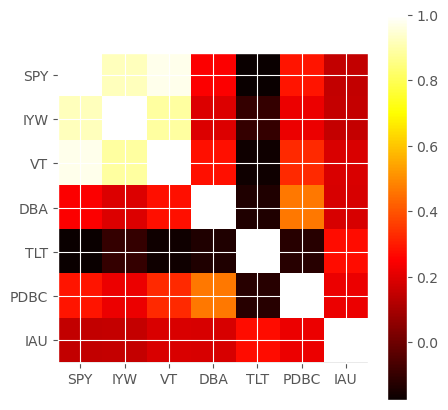

In [61]:
#Visualize it as a headmap
plt.imshow(df_corr, cmap ='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(df_corr)), df_corr.columns)
plt.yticks(range(len(df_corr)), df_corr.columns)

plt.gcf().set_size_inches(5,5)

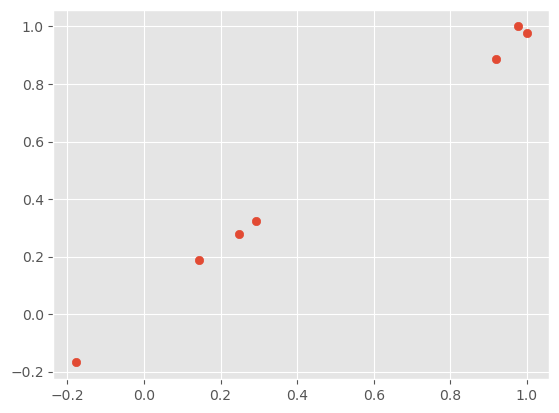

In [62]:
plt.scatter(df_corr.SPY, df_corr.VT)
plt.show()


In [63]:
periods = 75
vol = stock_daily_pc.rolling(window=periods).std()
vol


Ticker,SPY,IYW,VT,DBA,TLT,PDBC,IAU
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-19,0.786429,1.092845,0.788130,0.871073,1.326529,1.086542,0.870172
2023-12-20,0.802226,1.108207,0.801358,0.877274,1.317163,1.091593,0.867719
2023-12-21,0.804099,1.108331,0.810657,0.877129,1.319681,1.091647,0.867918


<Axes: xlabel='Date'>

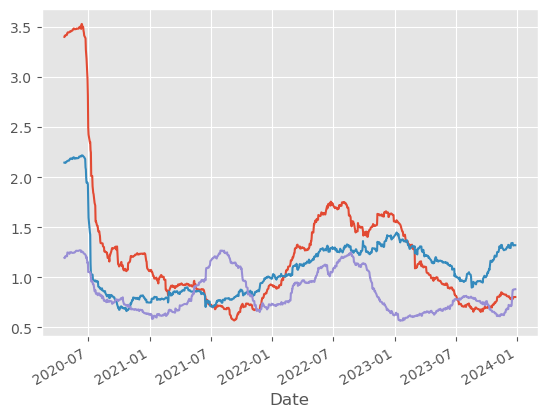

In [64]:
vol['SPY'].plot()
vol['TLT'].plot()
vol['DBA'].plot()